# <center>Hierarchical Clustering with Python and Scikit-Learn</center>

## 1. Role of Dendrograms for Hierarchical Clustering

In the last section, we said that once one large cluster is formed by the combination of small clusters, dendrograms of the cluster are used to actually split the cluster into multiple clusters of related data points. Let's see how it's actually done.

Suppose we have a collection of data points represented by a `numpy` array as follows:

In [1]:
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

Let's plot the above data points.

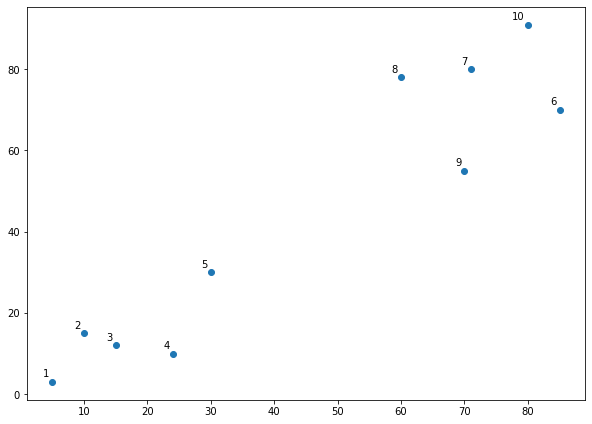

In [2]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

The script above draws the data points in the `X` numpy array and label data points from 1 to 10. 

Let's name the above plot as Graph1. It can be seen from the naked eye that the data points form **two clusters**: 

first at the bottom left consisting of points 1-5 while second at the top right consisting of points 6-10.

However, in the real world, we may have thousands of data points in many more than 2 dimensions. In that case it would not be possible to spot clusters with the naked eye. 

This is why clustering algorithms have been developed.

Let's draw the dendrograms for our data points. We will use the `scipy` library for that purpose:

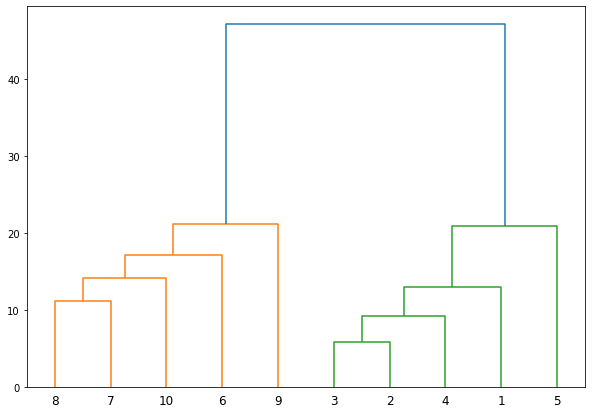

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

The algorithm starts by finding the two points that are closest to each other on the basis of Euclidean distance.

The vertical height of the dendogram shows the Euclidean distances between points. From the above figure, it can be seen that Euclidean distance between points 8 and 7 is greater than the distance between point 2 and 3.

Once one big cluster is formed,  a horizontal line is drawn.

The number of vertical lines this newly created horizontal line passes is equal to number of clusters. 

Take a look at the following plot:

<div align=center>
<img src="https://github.com/zhangjianzhang/text_mining/blob/master/files/codes/lecture_8/hierarchical-clustering-python-scikit-learn-3.png?raw=true">
<br>
</div>

Basically the horizontal line is a threshold, which defines the minimum distance required to be a separate cluster. 

If we draw a line further down, the threshold required to be a new cluster will be decreased and more clusters will be formed as see in the image below:

<div align=center>
<img src="https://github.com/zhangjianzhang/text_mining/blob/master/files/codes/lecture_8/hierarchical-clustering-python-scikit-learn-4.png?raw=true">
<br>
</div>

In the above plot, the horizontal line passes through four vertical lines **resulting in four clusters**: cluster of points 6,7,8 and 10, cluster of points 3,2,4 and points 9 and 5 will be treated as single point clusters.

## 2. Simple Example

In our first example we will cluster the X numpy array of data points that we created in the previous section.

The process of clustering is similar to any other unsupervised machine learning algorithm. 

We start by importing the required libraries:

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

The next step is to import or create the dataset. In this example, we'll use the following example data:

In [5]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

The next step is to import the class for clustering and call its `fit_predict` method to predict the clusters that each data point belongs to.

In [6]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [8]:
# help(AgglomerativeClustering)

Next we call the fit_predict method from the AgglomerativeClustering class variable cluster. 

This method returns the names of the clusters that each data point belongs to. 

Execute the following script to see how the data points have been clustered.

In [9]:
print(cluster.labels_)

[1 1 1 1 1 0 0 0 0 0]


The output is a one-dimensional array of 10 elements corresponding to the clusters assigned to our 10 data points.

As expected the first five points have been clustered together while the last five points have been clustered together.

It is important to mention here that these ones and zeros are merely labels assigned to the clusters and have no mathematical implications.

Finally, let's plot our clusters. To do so, execute the following code:

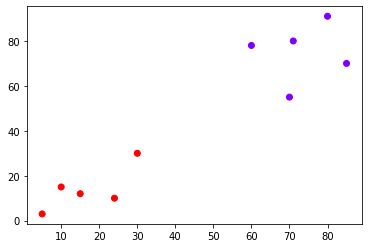

In [10]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

## 3. Clustering Shopping Data

In this example, we will perform hierarchical clustering on real-world data and see how it can be used to solve an actual problem.

The problem that we are going to solve in this section is to segment customers into different groups based on their shopping trends.

The dataset for this problem can be downloaded from the following link:

https://raw.githubusercontent.com/zhangjianzhang/text_mining/master/files/codes/lecture_8/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv

### 3.1 Import required libraries

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

### 3.2 Load the dataset

In [12]:
customer_data = pd.read_csv('./hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')

In [13]:
customer_data.shape

(200, 5)

In [14]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. 

To view the results in two-dimensional feature space, we will retain only two of these five columns. 

We can remove CustomerID column, Genre, and Age column. 

We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. 

Execute the following script to filter the first three columns from our dataset:

In [15]:
data = customer_data.iloc[:, 3:5].values

In [17]:
data.shape

(200, 2)

Next, we need to know the clusters that we want our data to be split to. We will again use the scipy library to create the dendrograms for our dataset. Execute the following script to do so:

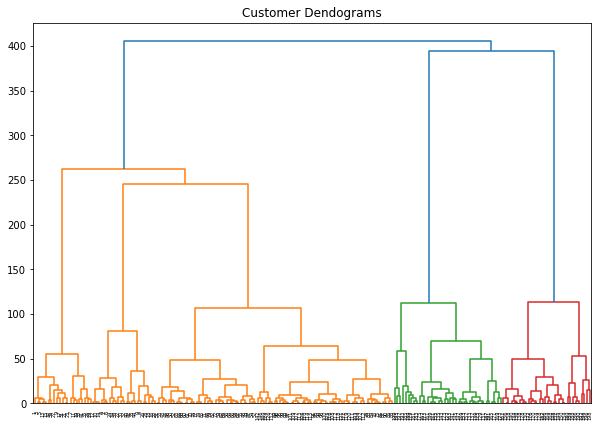

In [18]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In the script above we import the hierarchy class of the `scipy.cluster` library as `shc`. 

The hierarchy class has a `dendrogram` method which takes the value returned by the `linkage` method of the same class. 

The `linkage` method takes the dataset and the method to minimize distances as parameters. 

We use 'ward' as the method since it minimizes then variants of distances between the clusters.